# Data analysis

## Pandas 

In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

df= pd.read_csv(url, header=None)

df.head(n) muestra las primera n columnas del archivo (default 5)

In [2]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


df.tail(n) muestra las ultimas n columnas del archivo

In [3]:
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


Para escribir el archivo en nuestro dominio podemos agregar un path

In [4]:
path="/home/kevindroide/NDS/DataScience/TESE2022/automovile.csv"
#df.to_csv(path)

 Pandas ofrece lecturas y exportaciones de archivos csv, json, Excel, sql

    pd.read_csv() ----- df.to_csv()
    pd.read_json() ---- df.to_json()
    pd.read_excel() ---- df.to_excel()
    pd.read_sql() ---- df.to_sql()

El DataSet no tiene argumentos en header, por lo que podemos agregarlos:

In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("Headers:\n", headers)

Headers:
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [6]:
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [7]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


df.describe() ignora las columnas vacias, para incluir todas agregamos parametros
df.describe(include="all")

In [8]:
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


Se agregan tres parametros más a la estadística:


unique corresponde a la cantidad de objetos distintos en la columna

top corresponde al objeto más frecuente en la columna

freq corresponde a la frecuencia en la que el objeto top aparece

(NaN significa Not a Nomber)

Otro método para revisar el DataSet es df.info()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Para deshacernos de los valores nulos podemoa usar df.dropna()

df.drop() hace lo mismo pero con columnas enteras

El metodo por sí solo no genera cambios en el DataFrame, para ello se agrega el parámetro inplace=True

In [10]:
df.dropna(subset=["price"], axis=0)
#en axis, 0 representa la fila/row y 1 representa la columna

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Para obtener el DataType del DataFrame podemos usar df.dtype()

In [11]:
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


Podemos hace tambien de descripcion de headers específicos como parametros en un arreglo del DataFrame:

In [12]:
df[["length", "compression-ratio"]].describe()

,length,compression-ratio
count,205.000000,205.000000
mean,174.049268,10.142537
std,12.337289,3.972040
min,141.100000,7.000000
25%,166.300000,8.600000
50%,173.200000,9.000000
75%,183.100000,9.400000
max,208.100000,23.000000


## Remplazar valores
Para esto se usa el método df.replace(valor_a_remplazar, nuevo_valor)

Es comun que si un valor está extraviado se use el valor promedio de la columna, entonces calculamos el promedio de la "normalized-losses"

np.nan() retorna los valores NaN

Reemplazamos los valores perdidos de ? para poder hacer un promedio

El metodo replace() da una salida al reemplazamiento pero no modifica el Dataframe, por lo tanto, se hace una asignación

In [13]:
import numpy as np

df["normalized-losses"] = df["normalized-losses"].replace("?",np.NaN).astype(float)

In [14]:
df["normalized-losses"]

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [15]:
#obtenemos el promedio y remplazamos
prom = df["normalized-losses"].mean().astype(int)
print(prom)

122


In [16]:
df["normalized-losses"]= df["normalized-losses"].replace(np.NaN,prom)

In [17]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Ahora puede verse que los valores nulos "?" fueron reemplazados por el valor promedio 122

### Para identificar el tipo de dato:
    df.dtype()
### Para convertir a un tipo de dato
    df.astype()

## Normalización
Tres formas de normalización      

# i)    $x_{nor}$ = ${x_i}\over{x_{max}} $  (Simple Feature scaling)

# ii) $ x_{nor}$ = ${x_i - x_{min}} \over {x_{max} - x_{min}} $ (Min-Max)

# iii) $x_{nor}$ = ${x_i -\mu} \over {\sigma}$ (Z-score)

En Python podemos escribir:

>df["feature"] = df["feature"]/df["feature"].max()
    
>df["feature"] = (df["feature"] - df["feature"].min())/(df["feature"].max - df["feature"].min())

>df["feature"] = (df["feature"] - df["feature"].mean())/df["feature"].std()

##  Binning
Binning es cuando se categorizan valores de una variable en acotaciones
   
   i.e. edad: [0,6],[7,13],[14,18],[19,30]...

Podemos usar el df anterior para categorizar precios como: Low, Normal, High

Para ello creamos particiones de los precios usando Numpy

In [18]:

#"price" es de tipo object, por lo que reemplazaremos los valores

df["price"] = df["price"].replace("?",np.NaN).astype(float)
df["price"].dropna(axis=0)
df["price"] = df["price"].astype(float)

In [19]:
bins = np.linspace(min(df["price"]), max(df["price"]), 4)

In [20]:
price_bins = ["Low","Medium","High"]

Podemos usar el metodo de pandas pd.cut() para hacer el arreglo de los bins

In [21]:
df["price-binned"] =  pd.cut(df["price"],bins,labels=price_bins,include_lowest=True)

<AxesSubplot:>

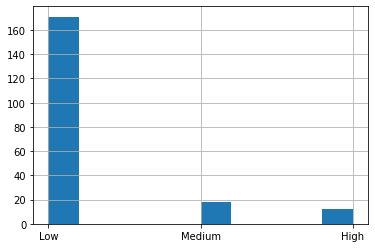

In [22]:
df["price-binned"].hist()

# Variables categoricas a numericas
Eventualmente encontramos variables categoricas, como el tipo de combustible, para hacer conteo de cada una de las categorias podemos usar
>pd.get_dummies() 

Este proceso se conoce como 
### One-Hot encoding

In [23]:
pd.get_dummies(df["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


# Herramientas de visualización
## matplotlib

Es una librería para la creación de graficas

Podemos empezar con un histograma de los precios de los autos

(array([81., 45., 35., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

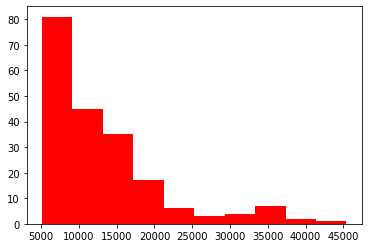

In [24]:
import matplotlib.pyplot as plt

plt.hist(df["price"], bins=10, color="red")

Podemos agregar notaciones a nuestras graficas para un mejor entendimiento de lo que se grafica

Text(0, 0.5, 'Frecuencia')

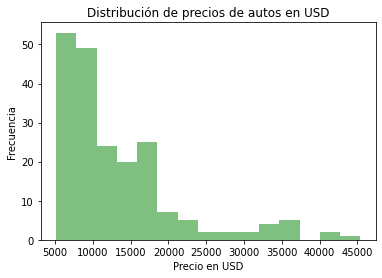

In [25]:
plt.hist(df["price"], bins=15, color="green", alpha=0.5)
plt.title("Distribución de precios de autos en USD")
plt.xlabel("Precio en USD")
plt.ylabel("Frecuencia")

Podemos también agrupar y acomodar datos de interés, como el tipo de cuerpo.

También podemos hacer calculos sobre los grupos extraidos.

In [26]:
df_body = df.groupby("body-style")["price"].mean()
df_body.head()

body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wagon          12371.960000
Name: price, dtype: float64

Así, también podemos graficar sobre nuestras nuevas agrupaciones.

Usaremos una grafica de barras para visualizar los precios promedio por tipo de cuerpo del auto

<AxesSubplot:title={'center':'Precios promedio por tipo de cuerpo'}, xlabel='Tipo de cuerpo', ylabel='Precios promedio'>

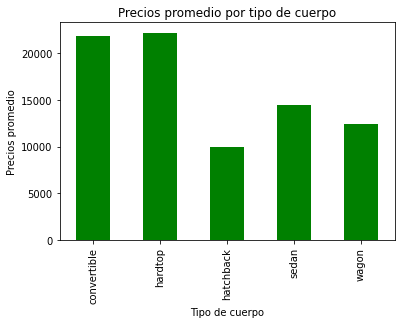

In [27]:
df_body.plot(kind="bar", width=0.5, color="green", title="Precios promedio por tipo de cuerpo", xlabel="Tipo de cuerpo", ylabel="Precios promedio")

<AxesSubplot:title={'center':'Body styles in dataframe'}, ylabel='body-style'>

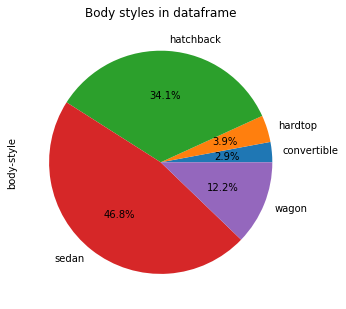

In [28]:
df_body["frecuency"] = df["body-style"].value_counts().sort_index()
df_body["frecuency"].plot(kind="pie", figsize=(5, 6), autopct='%1.1f%%', title="Body styles in dataframe")

In [29]:
df["horsepower"] = df["horsepower"].replace("?",np.NaN).astype(float)
df["horsepower"].dropna(axis=0, inplace=True)
df["peak-rpm"] = df["peak-rpm"].replace("?",np.NaN).astype(float)
df["peak-rpm"].dropna(axis=0, inplace=True)

<AxesSubplot:xlabel='horsepower', ylabel='peak-rpm'>

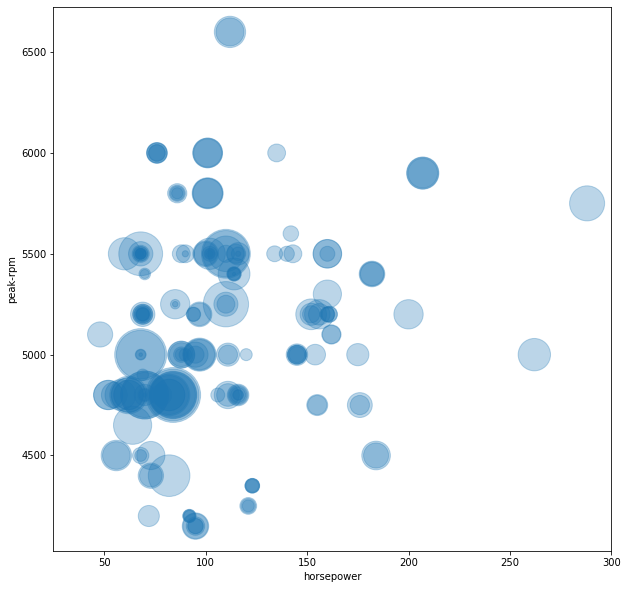

In [30]:
norm_price = (df["price"] - df["price"].min()) / (df["price"].max() - df["price"].min())
#norm_price = (df["price"] - df["price"].mean())/(df["price"].std())
df.sort_values("horsepower").plot(
        kind="scatter",
        x="horsepower",
        y="peak-rpm",
        alpha=0.3,
        s=norm_price*3000+10,
        xlim=(25,300),
        figsize=(10,10))

<AxesSubplot:xlabel='drive-wheels'>

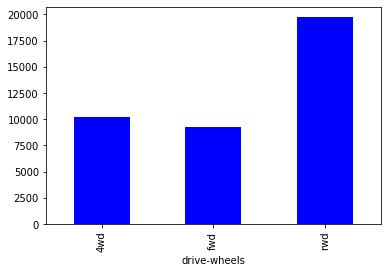

In [31]:
df.groupby("drive-wheels")["price"].mean().plot(kind="bar", width=0.5, color="blue")


# Exploratory Data Analysis
### Estadística descriptiva

Podemos usar el método df.describe() para obtener infromación estadística del DataSet, sin embargo, ésta función ignora los elementos NaN.

Sin embargo, podemos describir datos categóricos usando el método value_counts()

In [32]:
df["fuel-type"].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

## Boxplots
### Diagrama de cajas
Con Boxplots podemos hacer comparaciones en la distribución de la información

Hagamos otro DataFrame con los datos del tipo de tracción

In [33]:
drive_wheels_counts= df["drive-wheels"].value_counts()
drive_wheels_counts.rename({"drive-wheels":"value_counts"},inplace=True)
drive_wheels_counts.index.name="drive-wheels"

In [34]:
drive_wheels_counts

drive-wheels
fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

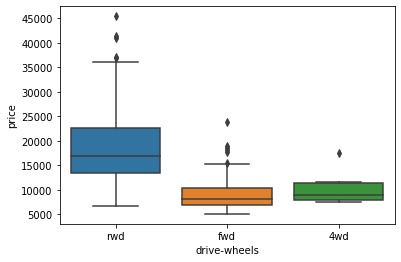

In [35]:
import matplotlib as mpl
import seaborn as sns

sns.boxplot(x="drive-wheels", y="price", data=df)

En un grafico de cajas:

    -La linea del centro de la caja representa la mediana. Una mitad de los datos está por debajo de este valor, y la otra por encima. 
    
    -Los extremos de arriba y abajo de la caja indican los cuantiles, o percentiles, 25 y 75. Estos dos cuantiles también se conocen como cuartiles, porque separan cuartos (25 %) de los datos. La longitud de la caja es la diferencia entre estos dos percentiles y se conoce como rango intercuartílico (IQR).

    -Las líneas que se extienden desde la caja se llaman bigotes. Los bigotes representan la varianza esperada de los datos.

    -Si hay datos que queden por encima o por debajo de los extremos de los bigotes, se los representa con puntos. Estos puntos se conocen como valores atípicos. Un valor atípico es el que supera la varianza esperada. Merece la pena revisar estos puntos de datos para aclarar si son atípicos o erróneos.
        


Así podemos ver que existe una variación en el precio más grande entre los sistemas de llantas traseras que entre los sistemas de cuatro llantas

## Scatter Plot
Ayudan a detectar si existe correlación entre los datos, cuenta con dos variables:

    Predictor/Independent (La que nos interesa si tiene correlación)
    Target/dependent (La que intentamos predecir

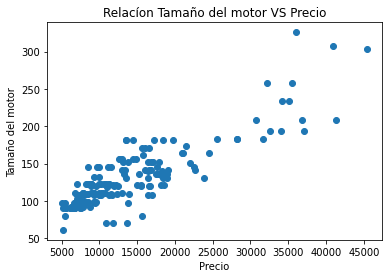

In [36]:
y=df["engine-size"]
x=df["price"]

plt.scatter(x,y)
plt.title("Relacíon Tamaño del motor VS Precio")
plt.ylabel("Tamaño del motor")
plt.xlabel("Precio")
plt.show()

Así, podemos ver que a mayor precio, existe una tendencia a mayor tamaño del motor

## Grouping
Pandas contiene el método df.Groupby(), éste puede aplicarse a variables categóricas.
Ésta crea grupos de datos en subsets incluyendo las distintas categorias de la variable, que puede ser una o varias.

Podemo así extraer columnas de interes para analizar si el tipo de sistema de llantas tiene relación con el precio:

In [37]:
df_wheels = df[["drive-wheels", "body-style",  "price"]]

In [38]:
df_grupo =  df_wheels.groupby(["drive-wheels","body-style"], as_index=False).mean()
df_grupo

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Esta tabla no es tan fácil de leer a simple vista, por lo que podemos usar el método df.pivot()
para poder reordenar el indice y las columnas de interés:

In [39]:
df_pivot = df_grupo.pivot(index="drive-wheels", columns="body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

## Heatmap

Heatmap es un método de matplotlib que toma una tabla rectangular y les asigna un color vasado en el valor de cada elemento. Así pueden analizarse facilmente un conjunto de variables a la vez.

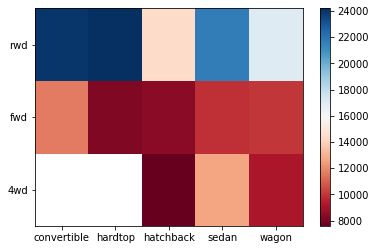

In [40]:
#plt.pcolor(df_grupo["body-style"], df_grupo["drive-wheels"], np.array(df_grupo["price"]), cmap="RdBu")
plt.pcolor(df_pivot, cmap="RdBu")
plt.colorbar()
plt.yticks(np.arange(0.5, len(df_pivot.index), 1), df_pivot.index)
plt.xticks(np.arange(0.5, len(df_pivot.columns), 1), df_pivot.columns.get_level_values(1))
plt.show(6,5)


## ANOVA
Analysis of Variance
El método ANOVA encuentra la correlación entre distintos grupos de una variable categórica. Este método retorna dos elementos:

## $ F_{statistic} $ = $ varianza_{grupo} \over varianza_{grupos} $

    F-statistic score: Variación entre el promedio del grupo divividido por la varianza

        -Un valor grande de F implica una gran varianza entre la categoría y la variable objetivo
        
        -Un valor pequeño de F implica poca varianza entre la variable categórica y la variable objetivo
        
#### Entre mayor sea el valor de F-statistic, mayor diferencia habrá entre los grupos 

    
    p-value: Valor de confianza, el valor de esto sintetiza la reelevancia de la estadística

#### $ {p} < 0.05 $ Podemos concluir que hay una diferencia estadística significativa entre los promedios de cada grupo

#### $ {p} >> 0.05 $ Sigifica que no existen suficientes datos para concluir la diferencia significativa entre los promedios de cada grupo
    
Para éste método es necesario la librería SciPy.stats

In [41]:
import scipy.stats as stats

df_anova = df[["make", "price"]]
grouped_anova = df_anova.groupby(["make"])

In [42]:
anova_results = stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("subaru")["price"])
anova_results

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

#### 'statistic' representa el valor de F, que en este caso es menor a 1, entonces no hay mucha diferencia entre los precios de ambos grupos

#### Pero p >> 0.05, entonces no se puede comprobar la hipótesis de que los promedios de los grupos son similares.

Comparando ahora contra la marca "jaguar":

In [43]:
anova_results = stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("jaguar")["price"])
anova_results

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

#### Podemos ahora ver un valor de F muy grande y un valor de p muy pequeño, por lo que se concluye que existe gran varianza entre lo precios de Honda y Jaguar

# Correlation

Mide en qué forma distintas variables son independientes


(0.0, 53187.935940405005)

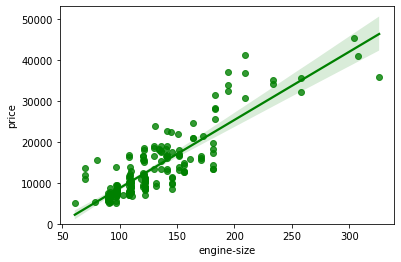

In [44]:
sns.regplot(x="engine-size", y="price", data=df, color="green")
plt.style.use("ggplot")
plt.ylim(0,)

Podemos ver una tendencia en una pendiente positiva.

Hagamos otro análisis entre galones por litro y el precio:

(0.0, 48178.746778904984)

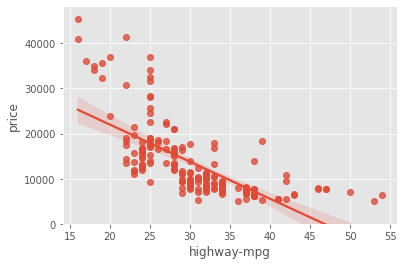

In [45]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Ahora podemos ver una pendiente negativa: entre más millas por galón consume un auto, menor tiende a ser su precio.

Así podemos decir que existe una relación lineal negativa entre mpg y el precio

Podemos tambien descartar otras relaciones que no muestren una tendencia, por ejemplo rpm:

In [46]:
# "peak-rpm" es de tipo object, por lo que lo convertimos a tipo int
#df["peak-rpm"] = df["peak-rpm"].replace("?",0).astype(int)
#df["peak-rpm"] = df["peak-rpm"].astype(int)

#Ajustamos tambien los 0 al promedio para no tener incongruencias
rpm_prom = df["peak-rpm"].mean().astype(int)
df["peak-rpm"] = df["peak-rpm"].replace(np.NaN,rpm_prom).astype(int)


(0.0, 47414.1)

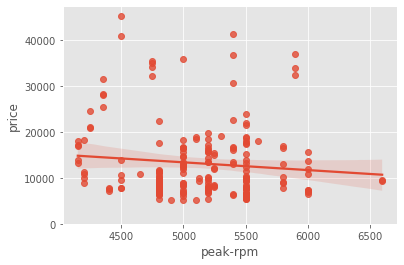

In [47]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Podemos ver que el valor de RPM no tiene una correlación evidente, por lo que los datos de RPM no son efectivos para predecir precios

## Pearson Correlation
Mide una magnitud de correlación en dos prámetros:
    
    Coeficiente de correlación:
-Valores cercanos a 1 indican una grande correlación positiva

-Valores cercanos a -1 indican una grande correlación negativa

-Valores cercanos a 0 indican que no hay correlación entre la variabes

    P-value:
Mide qué tan certero es el coeficiente de correlación anterior

P-value < 0.001 indican gran certeza

P-value < 0.05 indican certeza moderada

P-value < 0.1 indican certeza débil

P-value > 0.1 indican que no hay certeza en el resultado



### Así podemos decir que una correlación es fuerte si el coeficiente es cercano a 1 o a -1 y que el P-value es menor a 0.001

In [48]:
# "horsepowe" es de tipo object, por lo que lo convertimos a tipo int
#df["horsepower"] = df["horsepower"].replace("?",0).astype(int)
#df["horsepower"] = df["horsepower"].astype(int)

#Ajustamos tambien los 0 al promedio para no tener incongruencias
rpm_prom = df["horsepower"].mean().astype(int)
df["horsepower"] = df["horsepower"].replace(np.NaN,rpm_prom).astype(int)


In [49]:
df[df["price"].isnull()]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price-binned
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN,NaN
44,1,122.0,isuzu,gas,std,two,sedan,fwd,front,94.5,...,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN,NaN
45,0,122.0,isuzu,gas,std,four,sedan,fwd,front,94.5,...,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN,NaN
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN,NaN


In [50]:
df["price"] = df["price"].apply(pd.to_numeric, errors = 'coerce')
df.dropna(how='any', inplace=True)
df[df["price"].isnull()]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price-binned


In [51]:
pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
print("Pearson Coef: ", pearson_coef, " P-value: ", p_value)

Pearson Coef:  0.8096068016571054  P-value:  6.273536270650504e-48


Podemos ver que el Coeficiente de Pearson es 0.1, por lo que es cercano a 1, y el valor de p es muy muy pequeño, por lo que hay certeza en el resultado

Puede entonces decirse que existe gran correlación positiva entre el "horsepower" y el precio

Podemos también usar el método de pandas df.corr() para hacer una menos descriptiva pero más general de nuestro Dataframe:

In [52]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.182196,0.075810,0.279739,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.114713,0.217300,0.239544,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.250313,0.371178,-0.360301,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.159733,0.579795,-0.285973,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.189867,0.615056,-0.245803,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.259737,-0.087001,-0.309971,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.156433,0.757981,-0.279360,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.028889,0.822668,-0.256734,-0.650546,-0.679571,0.872335
compression-ratio,-0.182196,-0.114713,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,1.000000,-0.214489,-0.435777,0.331425,0.268465,0.071107
horsepower,0.075810,0.217300,0.371178,0.579795,0.615056,-0.087001,0.757981,0.822668,-0.214489,1.000000,0.107884,-0.822192,-0.804579,0.809607


In [53]:
df[["price","horsepower", "engine-size", "compression-ratio", "city-mpg","peak-rpm"]].corr()

,price,horsepower,engine-size,compression-ratio,city-mpg,peak-rpm
price,1.000000,0.809607,0.872335,0.071107,-0.686571,-0.101612
horsepower,0.809607,1.000000,0.822668,-0.214489,-0.822192,0.107884
engine-size,0.872335,0.822668,1.000000,0.028889,-0.650546,-0.256734
compression-ratio,0.071107,-0.214489,0.028889,1.000000,0.331425,-0.435777
city-mpg,-0.686571,-0.822192,-0.650546,0.331425,1.000000,-0.115410
peak-rpm,-0.101612,0.107884,-0.256734,-0.435777,-0.115410,1.000000


Así, en la primera fila podemos encontrar las correlaciones entre el precio y los otros atributos.

Podemos decir con ésto que para el precio hay más reelevancia en el tamaño del motor que en las rpm

<AxesSubplot:>

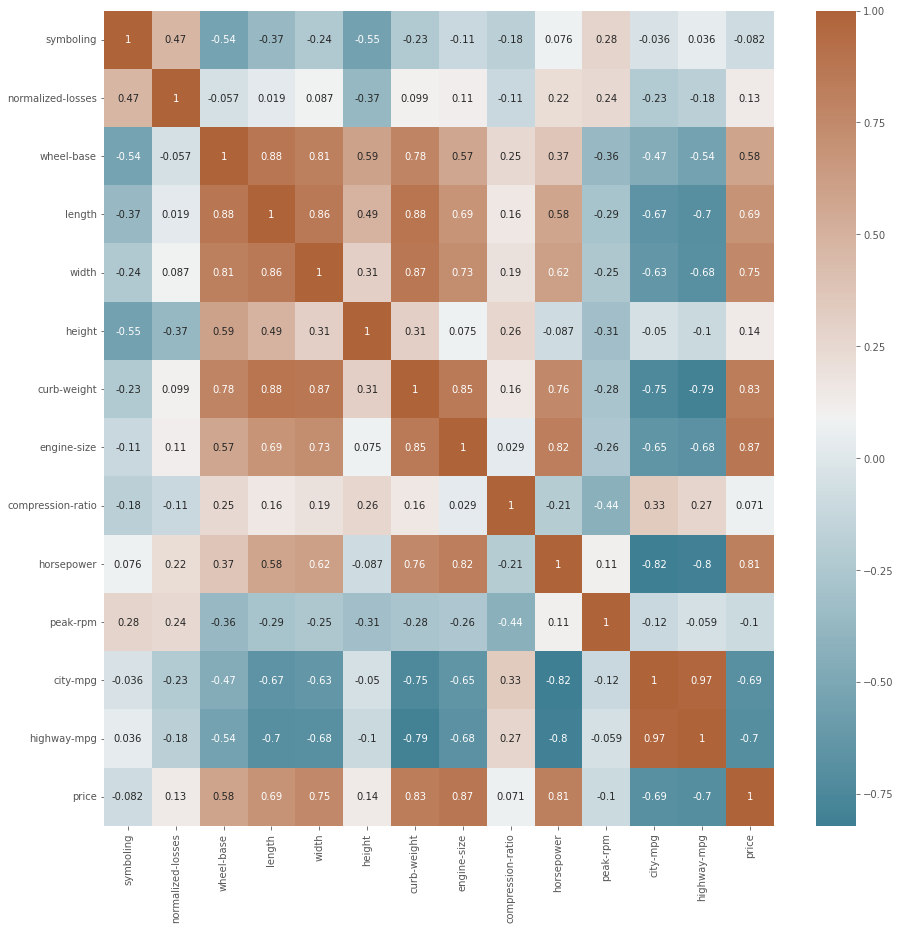

In [54]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 30, as_cmap=True))


# Model Development

### Simple Linear Regression

La regresión lineal simple es un método para comprender la relación entre dos variables:
    
    Predictor/independiente: x
    Target/dependiente: y
    
Deseamos encontrar una relación lineal entre ambas variables de la forma:

# $y$ = $b_0 + b_1 x $

El parámetro $b_0$ es la insersección, $b_1$ es la pendiente de la recta.

Utilizaremos linear_model del paquete scikit-learn
    


In [55]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

Definimos las variables independiente y dependiente:

In [56]:
X = df[["highway-mpg"]]
Y = df["price"]

El metodo lm.fit() para ajustar los parámetros del modelo y encontrar los parámetros $b_0, b_1$

Podemos obtener la predicción con el método lm.predict(), cuya salida es un arreglo

In [57]:
lm.fit(X,Y)
Yhat=lm.predict(X)
print(X.size)
print(Y.size)
print(Yhat.size)

201
201
201


Podemos encontrar la intersección $b_0$ usando lm.intercept_, y obtenemos $b_1$ usando lm.coef_

In [58]:
print("b_0 = ", lm.intercept_)
print("b_1 = ",lm.coef_)

b_0 =  38423.3058581574
b_1 =  [-821.73337832]


Por lo tanto, la relación lineal quedará representada como

    Precio = 38423.30 -(821.73)*highway-mpg

### Multiple Linear Regression

Éste método permite encontrar la relación entre:

    Una variable Target: y
    
    Dos o más variables Predictors: x
    
Si tuvieramos cuatro varirables predictorias, tendríamos una ecuación tal que:

# $\hat{Y}$ = $b_0 + b_1 x_1 + b_2 x_2 + b_3 x_3 + b_4 x_4 $

Para extraer las variables que queremos predecir las guardamos en una variable:

In [59]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z,df["price"])


LinearRegression()

In [60]:
print(lm.intercept_)
print(lm.coef_)

-15811.863767729232
[53.53022809  4.70805253 81.51280006 36.1593925 ]


#### lm.intercept_ representa la intersección, es decir, el término independiente de la relación lineal, mientras lm.coef_ representa la pendiente

### Regression plot

Nos da un estimado de la relación de dos variables, la relevancia de la correlación y la direcciónn de la la relación. 
Para visualizarlo usaremos regplot() de seaborn

(0.0, 48185.89951745894)

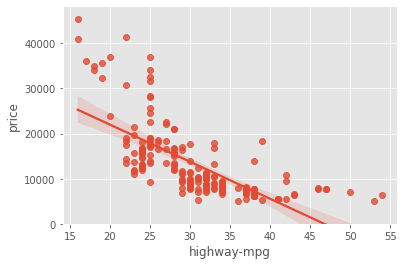

In [61]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

### Residual plot

El residual plot representa el error entre los valores reales. El residuo representa la distancia entre el valor predecido Yhat y el valor correcto Y

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

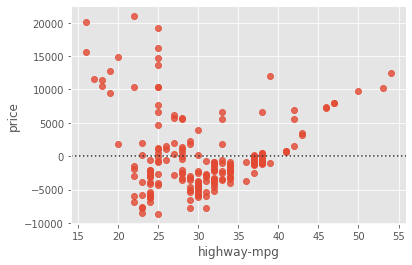

In [62]:
sns.residplot(x="highway-mpg", y="price", data=df)

### Distrubition plot

Podemos hacer una gráfica de la dristribución entre los valores predecidos con los valores reales

/home/kevindroide/miniconda3/envs/DS/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/kevindroide/miniconda3/envs/DS/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Proporción del auto')

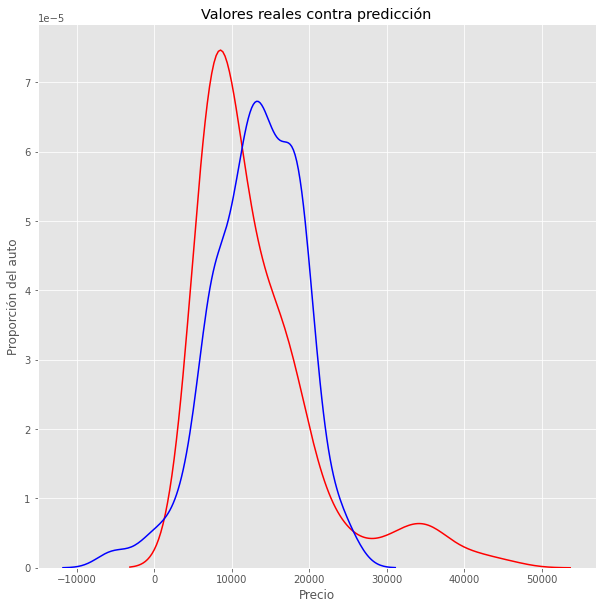

In [63]:
plt.figure(figsize=(10,10))
ax1 = sns.distplot(df["price"], hist=False, color="r", label="Valor real")
sns.distplot(Yhat, hist=False, color="b", label="Prediccion", ax=ax1)
plt.title("Valores reales contra predicción")
plt.xlabel("Precio")
plt.ylabel("Proporción del auto")


### Polonomial regression

Cuando el modelo no puede predecirse con un modelo lineal podemos utilizar una regresión polinómica. Es práctica para adaptar modelos con curvaturas.

    Regresión polinómica de orden n:
$\hat{Y}$ = $ b_0 + b_1 x_1 + b_2 {x_2}^2 + ... + b_n {x_n}^n $

En python podemos usar numpy para ajustar modelos polinómicos usando np.polyfit() y np.poly1d() para mostrarlo

#### Definiremos una función para poder graficar polinomios

In [64]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [65]:
x = df["highway-mpg"]
y = df["price"]

In [66]:
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


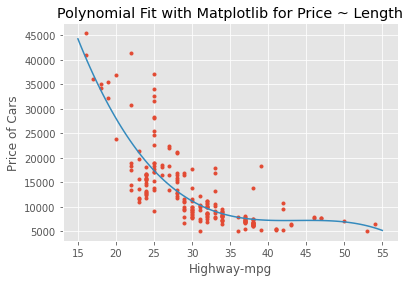

In [67]:
PlotPolly(p, x, y, "Highway-mpg")

Podemos usar "preprocessing" en sci-kit-learn para crear un objeto polinómico.

El constructor toma el grado del polinomio como parámetro para después poder transformarlo en un objeto con fit_transform()

In [68]:
from sklearn.preprocessing import PolynomialFeatures

pr= PolynomialFeatures(degree=2, include_bias=False)

x_polly = pr.fit_transform(df[["horsepower", "curb-weight"]])

Podemos normalizar cada atributo simultaneamente:

In [69]:
from sklearn.preprocessing import StandardScaler

SCALE = StandardScaler()

SCALE.fit(df[["horsepower", "highway-mpg"]])

x_scale = SCALE.transform(df[["horsepower", "highway-mpg"]])

Podemos simplificar éstos códigos usando Pipelines, que sigue los pasos:

Normalización ---> Transformación Polinómica ---> Regresión Lineal

In [70]:
from sklearn.pipeline import Pipeline

Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(degree=3)), ("model", LinearRegression())]

pipe = Pipeline(Input)

pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

In [71]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

Crearemos una funcion para poder graficar nuestra regresión polinómica:

In [72]:
from ipywidgets import interact, interactive, fixed, interact_manual

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    #lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Datos de entrenamiento')
    plt.plot(xtest, y_test, 'go', label='Datos de prueba')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Función de regresión', linewidth=2, color='blue',)
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()
    
    return plt

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Precio [USD]')
    plt.ylabel('Proportion of Cars')

def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)
    

### Evaluación del modelo

Son formas para evaluar qué tan preciso es el modelo que tenemos comparado con los valores reales. Dos métodos son importantes:

    Mean Squared Error (MSE): Error cuadrático medio
Debemos encontrar la diferencia entre los valores reales (y) y los valores predecidos (Yhat) y elevarla al cuadrado. Posteriormente se obtiene el promedio del cuadrado de los errores.
    
    R-squared (R^2):
También llamado coeficiente de determinación, mide qué tan cercanos son los valores reales contra los predecidos. Representa el porcentaje de la variación del valor real que puede ser explicado por el modelo
    
# $R^2$ = $ ({1} - {{ MSE_{regression-line}} \over {MSE_{average-data}}}) $
    
    
Para obtener el MSE podemos usar el método mean_squared_error(valor real, valor predecido): 

In [73]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df["price"], Yhat)

31635042.944639888

El valor de $R^2$ lo podemos obtener usando el método lm.score()

In [74]:
X=df[["highway-mpg"]]
Y=df["price"]

lm.fit(X,Y)

lm.score(X,Y)

0.4965911884339176

Esto dice que el modelo lineal predice el 49.65% de la variación del precio

# Prediction and  decision making

Determinaremos si un modelo es de fiar, para esto podemos utilizar visualización, métodos numéricos y comparación entre distintos modelos.

Primero entrenamos el modelo con lm.fit() y después agregamos como parámetro el valor que queremos determinar en lm.predict()


In [75]:
lm.fit(X,Y)
lm.predict(X)[30] #Corresponde a una predicción del precio de un auto con 30 highway-mpg

7197.437481924233

El primer método para visualizar y hacer un análisis del model es un RegressionPlot, pues puede apreciarse de una forma más clara la correspondencia de los valores.

En un Resicual plot podemos aún confirmar el comportamiento de las gráficas: si podemos apreciar una curva, se sugiere un comportamiento no-lineal.

Los Distribution plot son un buen método para evaluar múltiples variables.

El MSE es intuitivo para determinar si el modelo es bueno o no, así como lo es también $R^2$


# Evaluación y refinación del modelo

Anteriormente hemos evaluado nuestros modelos en base a la información con la que fue entrenado. Sin embargo aún no hemos evaluado un modelo para predecir nueva información.

Separar la información entre training/testing sets es algo importante para la evaluación del modelo. Usualmente, la gran mayoría de la información es usada para entrenar el modelo y sólo una pequeña parte es utilizada para testing.

Por ejemplo, podemos dividir el 70% de un dataset para entrenar el modelo y el otro 30% para probarlo. Posteriormente construimos el modelo usando training data y usamos la testing data para medir la eficiencia del modelo. Una vez terminado el testing, podemos usar toda la información para darle un mejor desempeño.

Una función popular para divivir un DataSet es la función train_test_split() en el paquete scikit-learn, que divide aleatoriamente la información que necesitamos. Por ejemplo:

       x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=03, random_state=0)
Donde x_data corresponde a la variable independiente, como los features del sistema, y y_data es el objetivo a predecir, como el precio. x_train, y_train corresponde al dataset para entrenar el modelo y x_test, y_test son para evaluar el modelo.
test_size corresponde al percentaje del dataset para la evaluación. random_state es una semilla para la separación aleatoria.

Generalization error es una medida para qué tan bien la información usada ayuda a predecir nueva información.

Cross Validation es una métrica de evaluación de la información, tanto de la de entrenamiento como la de evaluación. Cross validation crea distintas particiones del dataframe y permuta el testing data para deducir si la información puede producir un buen desempeño:

        scores = cross_val_score(lr, x_data, y_data, cv=3)
lr representa "linear regression" como el tipo de modelo y cv corresponde a la cantidad de particiones que se harán. El retorno se expresa como un arreglo, sin embargo podemo usar no.mean().

    yhat = cross_val_predict(lr2e, x_data, y_data, cv=3)
Tiene la misma sintaxis pero no devuelve una evaluación del modelo, sino la misma predicción del modelo que medimos.

In [76]:
from sklearn.model_selection import train_test_split

y_data = df["price"]
x_data = df.drop("price", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

print("Número de datos en test: ", x_test.shape[0])
print("Número de datos en train: ", x_train.shape[0])

Número de datos en test:  31
Número de datos en train:  170


In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lre=LinearRegression()

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

In [78]:
print("El promedio de los 'folds'es: ", Rcross.mean(), "y la desviación es: " , Rcross.std())

El promedio de los 'folds'es:  0.5220592359225414 y la desviación es:  0.29130480666118436


In [79]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lre, x_data[["horsepower"]], y_data, cv=4)

yhat[:5]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

### Overfitting, Underfitting and Model Selection

Asumiremos que los training points vienen de un función polinómica de la forma

$y(x)+ ruido$

El objetivo de la seleccion de un modelo es encontrar el orden del polinomio que mejor predice la función. En el caso anteior de una función polinómica, un modelo lineal resulta vago para expresar correctamente la función

Llamaremos Undefitting cuando un modelo es demasiado simple como para describir propiamente un sistema.

Al aumentar el polinomio del modelo lineal podemos hacer una aproximación mas certera del modelo, sin embargo, sucede también que un polinomio de grado muy alto puede predecir exactamente los puntos de prueba, pero falla en describir la función.

Llamamos entonces Overfitting cuando el modelo se ajusta más a los puntos de ruido que a la función que buscamos, ésto es común en las regiones con pocos data points.

Una buena forma de ubicar las regiiones de Underfitting y Overfitting es con los valores $R^2$. Podemos usar el siguiente código para hacer reconocimiento de los valores de $R^2$ según el orden del polinomio: 

In [80]:
lr=LinearRegression()

#lr.fit(x_train[["horsepower"]], y_train)

Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr=PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[["curb-weight"]])
    x_test_pr = pr.fit_transform(x_test[["curb-weight"]])
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))
#PollyPlot(x_train[["curb-weight"]], x_test[["curb-weight"]], y_train, y_test, lr, pr, n)
interact(f, order=(1,10,1), test_data=(0.05,0.95,0.05))
for n in order:
    print('Polynomial degree:' , n, 'R-squared:', Rsqu_test[n-1])

print('Max score:', max(Rsqu_test), 'with polynomial degree:', order[Rsqu_test.index(max(Rsqu_test))])



interactive(children=(IntSlider(value=5, description='order', max=10, min=1), FloatSlider(value=0.45, descript…

Polynomial degree: 1 R-squared: 0.8078357315359982
Polynomial degree: 2 R-squared: 0.837651932888557
Polynomial degree: 3 R-squared: 0.8138345875796164
Polynomial degree: 4 R-squared: 0.7679624604894678
Polynomial degree: 5 R-squared: 0.7744560297613109
Max score: 0.837651932888557 with polynomial degree: 2


Text(2.2, 0.835, 'Maximum R^2 ')

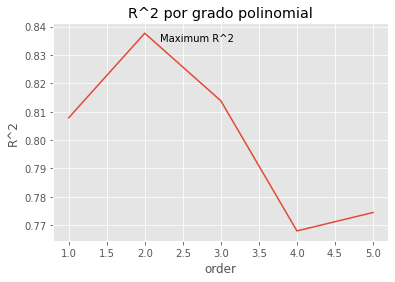

In [81]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 por grado polinomial')
plt.text(2.2, 0.835, 'Maximum R^2 ')  


### Ridge regression

Éste método nos previene de hacer Overfitting. Éste método crea una nueva variable "Alpha", la cual regula los coeficientes de nuestro polinomio. Éste es un parámetro que escogemos antes de entrenar nuestro modelo.

Para hacer una predicción usando ridge regression podemos usar un codigo como el siguiente:

In [82]:
from sklearn.linear_model import Ridge

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

RigeModel = Ridge(alpha=1)

RigeModel.fit(x_train_pr,y_train)

yhat =  RigeModel.predict(x_test_pr)

print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)



predicted: [ 9659.56430116  6481.02810704 10654.1531155   5323.42123605]
test set : [ 9549.  6229. 10245.  7295.]


Podemos crear un loop para encontrar el valor de Alpha más eficiente para el modelo

In [83]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:04<00:00, 249.73it/s, Test Score=0.82, Train Score=0.856]


Podemos graficar el comportamiento de estos valores

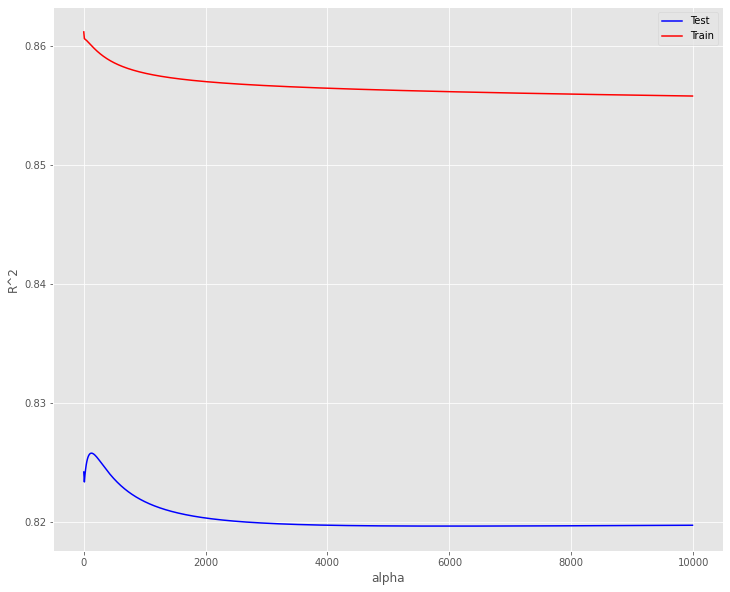

In [84]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, 'b',label='Test')
plt.plot(Alpha,Rsqu_train, 'r', label='Train')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

### Grid Search

Éste método nos permite hacer un análisis de múltiples parámetros en pocas lineas de código.
Parámetros como "Alpha" no son parte del proceso de entrenamiento del modelo, por lo que se les refiere como hyperparámetros.

Grid search toma los modelos u objetos de los que se tenga interés y los evalua bajo distintos hyperparámetros, posteriormente hace un cálculo del MSE y $R^2$ para poder escoger los hiperparámetros más apropiados.

El valor del grid search es una lista de python que contiene un diccionario

In [85]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

x_data = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]

y_data = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


parameters1 = [{"alpha":[0.001, 0.1, 1, 10 , 100, 1000, 10000, 100000],"normalize":[True, False]}]

RR=Ridge()

Grid1= GridSearchCV(RR,parameters1,cv=4)

Grid1.fit(x_data,y_data)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000],
                          'normalize': [True, False]}])

In [86]:
BestRR = Grid1.best_estimator_
print(BestRR)

Ridge(alpha=0.1, normalize=True)


Ahora predecimos sobre nuestros datos de prueba

In [87]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8205064919654268

In [88]:
scores = Grid1.cv_results_

scores["mean_test_score"]


array([ 0.66512394,  0.66455367,  0.69340708,  0.66455425,  0.69001301,
        0.66455947,  0.32126167,  0.66461136,  0.01692553,  0.66509813,
       -0.03033704,  0.66805577, -0.0353109 ,  0.67246748, -0.03581087,
        0.65696716])

In [89]:
y_hat = BestRR.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

/home/kevindroide/miniconda3/envs/DS/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/kevindroide/miniconda3/envs/DS/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


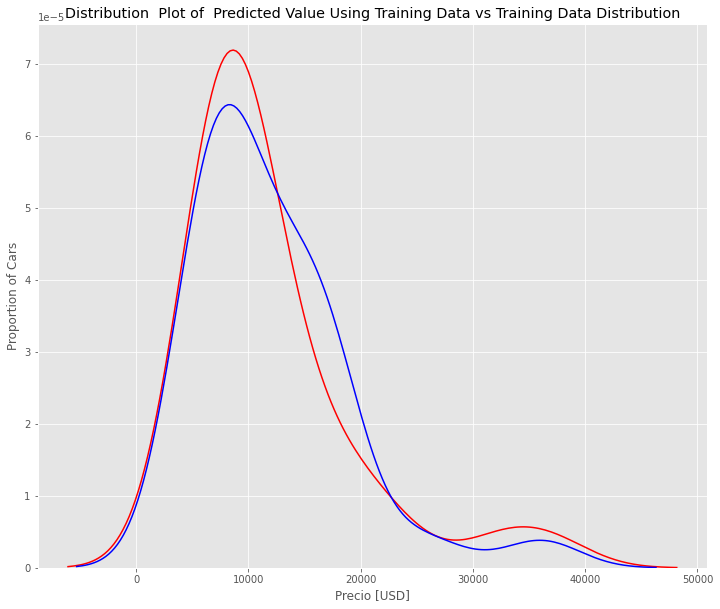

In [90]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, yhat, "Actual Values (Train)", "Predicted Values (Train)", Title)